<a href="https://colab.research.google.com/github/mdrahmed/Fake_news_prediction/blob/main/Fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# loading libraries required
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report

In [8]:
# loading the dataset to pandas dataframe
fake_data = pd.read_csv('/content/Fake.csv')
true_data = pd.read_csv('/content/True.csv')

In [9]:
# print the first 5 rows
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
# print the first 5 rows
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Checking the data for preprocessing



In [11]:
# counting the number of missing values
fake_data.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [12]:
# counting the number of missing values
true_data.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [13]:
# if there were null values, we could remove those with empty string like following
# fake_data = fake_data.fillna('')

# we can merge twos columns like following
# fake_data['merged_content'] = fake_data['author'] + ' ' + fake_data['title']
# true_data['merged_content'] = true_data['author'] + ' ' + true_data['title']

# separating the data & text
# X = fake_data.drop(columns='text', axis=1)
# Y = fake_data['text']

In [14]:
# We need a target column to define train the model
fake_data['label'] = 0
true_data['label'] = 1

In [15]:
# lets check the data size
fake_data.shape, true_data.shape

((23481, 5), (21417, 5))

In [16]:
# now, we have added the target class in the data
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
# Use the the first 5000 data of true and fake dataset for building the model.
frames = [true_data.loc[:5000][:], fake_data.loc[:5000][:]]


In [18]:
# concatenate the first 5000 data for true and false data
df = pd.concat(frames)
df.shape

(10002, 5)

In [19]:
X = df.drop('label', axis=1)
Y = df['label']

# Data Preprocessing

In [20]:
# during preprocessing/stemming procedure, we need to remove all the stopwords
import nltk
port_stem = PorterStemmer()
nltk.download('stopwords')
# printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # it will remove all the numbers and other that has anything except letters
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [22]:
df['text'] = df['text'].apply(stemming)

In [23]:
#separating the data and label
X = df['text'].values
Y = df['label'].values

In [24]:
# Tfidfvectorizer to convert textual data to numerical data. We are converting to this bcz numeric data best aligns with the input output.
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [25]:
# X is converted to numeric data
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1545878 stored elements and shape (10002, 40304)>
  Coords	Values
  (0, 264)	0.026760101015690627
  (0, 316)	0.0384607660069534
  (0, 361)	0.04010753313944684
  (0, 560)	0.02949866871096131
  (0, 618)	0.11937374289893288
  (0, 967)	0.02618896943409048
  (0, 975)	0.04784925026289253
  (0, 1167)	0.0587323047417741
  (0, 1559)	0.0374315065980628
  (0, 1561)	0.029410106706766886
  (0, 1733)	0.04096156574708105
  (0, 1874)	0.07481985423983774
  (0, 2258)	0.020282687853938827
  (0, 2398)	0.054131088579147765
  (0, 2640)	0.04073991608555111
  (0, 2839)	0.03170853563634205
  (0, 3214)	0.028830076200972613
  (0, 3219)	0.035222069643809
  (0, 3248)	0.070572004367929
  (0, 3261)	0.06129228992658083
  (0, 3823)	0.0392987535588354
  (0, 3837)	0.03515481602357428
  (0, 3856)	0.048734839324010716
  (0, 3983)	0.06547752832516453
  (0, 4319)	0.03525588703513872
  :	:
  (10001, 37640)	0.027975395483373956
  (10001, 37873)	0.02591157839127997


In [26]:
# Spliting the data into 2 data types, train and test data, here 80% is training data and 20% is test data
# taking 20% of the data is test data and defined as test_size = 0.2
# Y is 0 or 1, so, that's why used stratify for Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# Training Model Logistics Regression


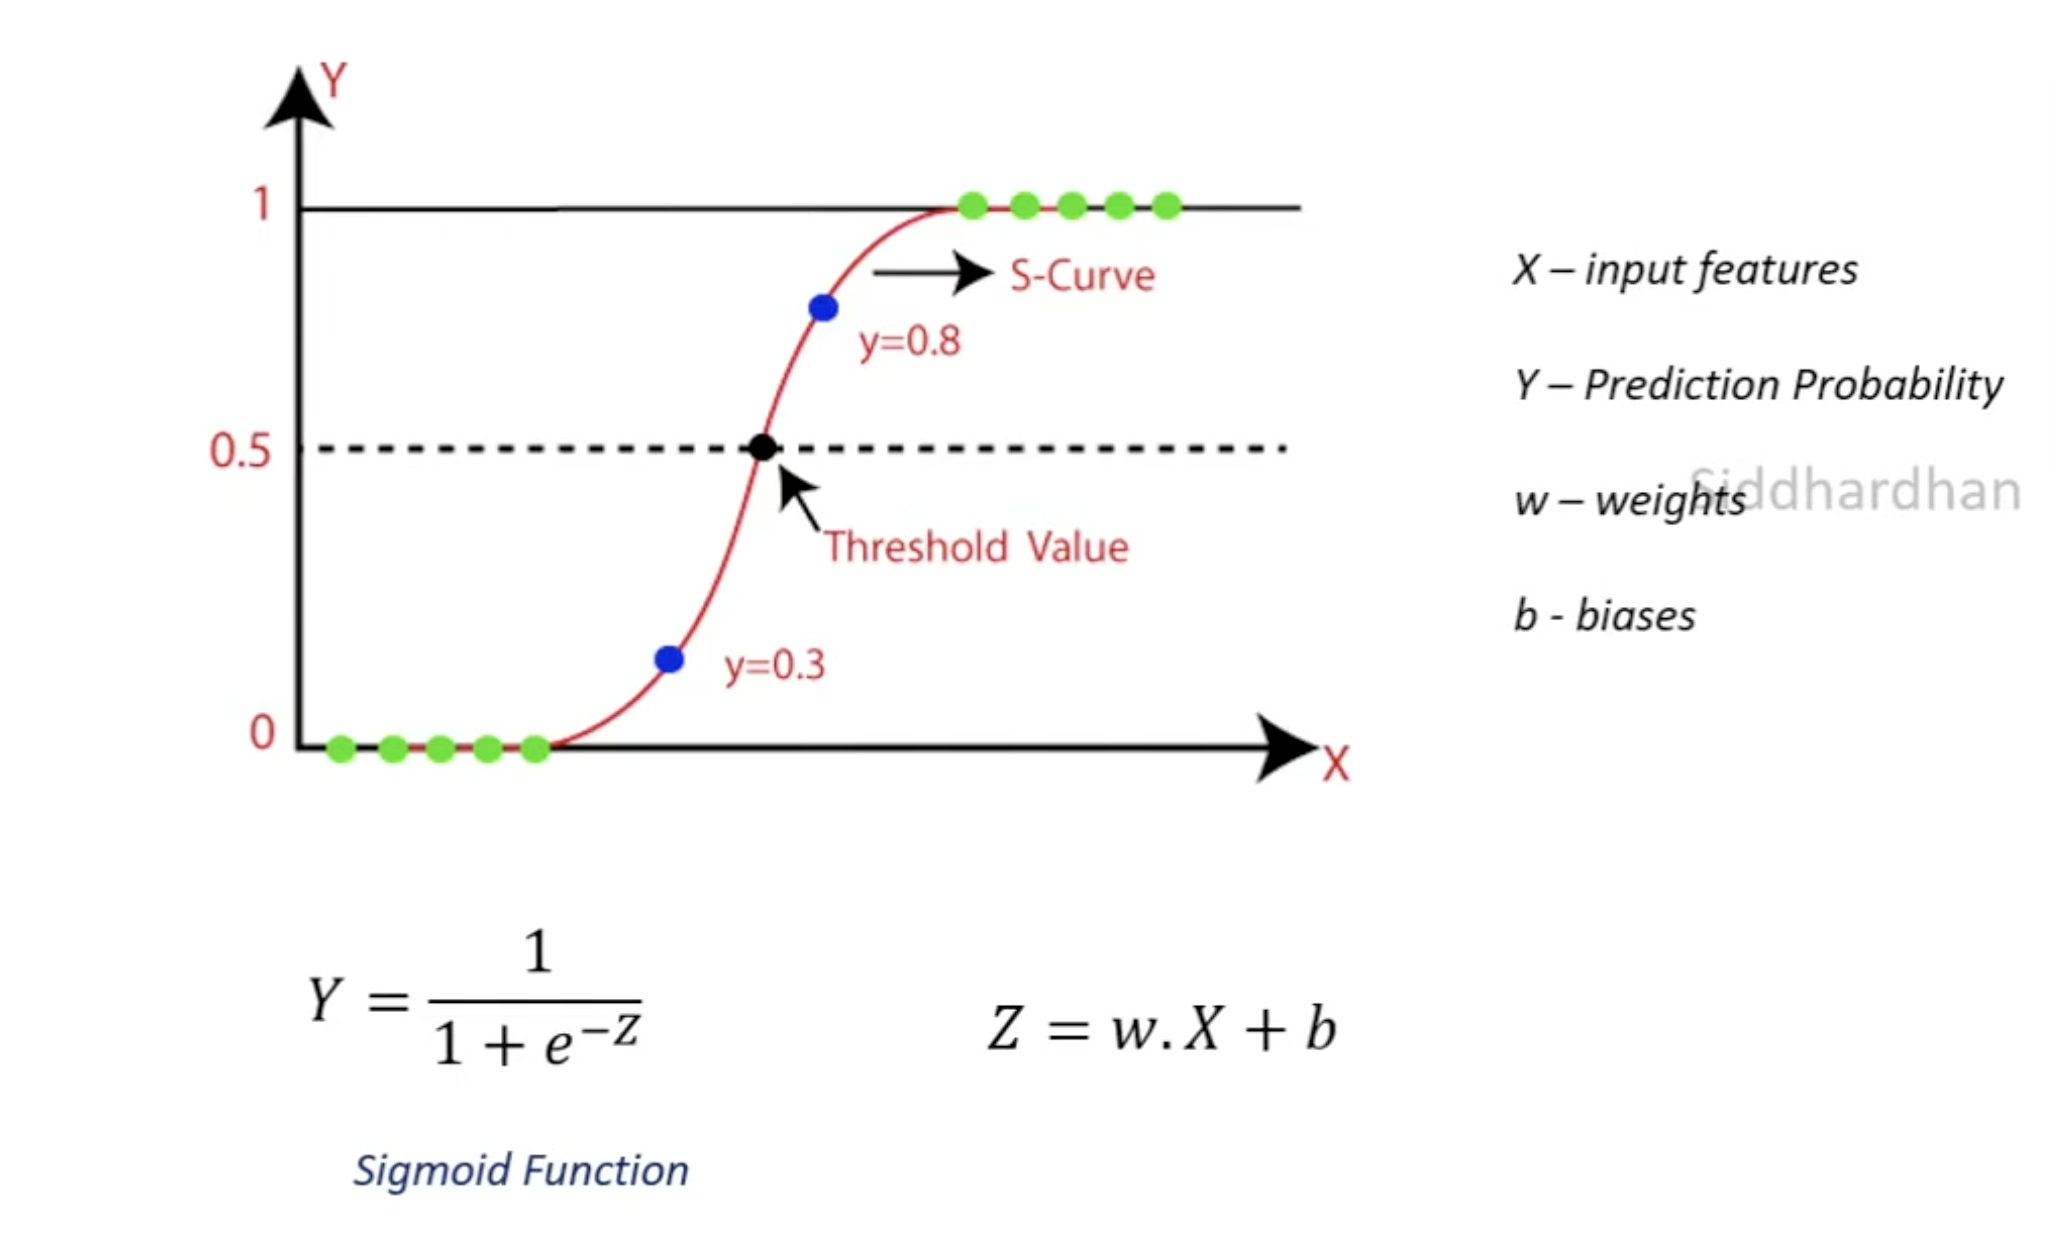

Logistics Regression is predicting Y based on the sigmoid function. If the threshold value is greater than 0.5 then it's 1 otherwise 0.

In [27]:
# For binary classification, logistics regression is great
LR_model = LogisticRegression()

In [28]:
# Training the model with training date
LR_model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
# accuracy score on the training data
X_train_prediction = LR_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.995750531183602


In [31]:
# accuracy score on the test data
X_test_prediction = LR_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9900049975012494


# Predictive System to predict on new data

In [33]:
X_new = X_test[1]

prediction = LR_model.predict(X_new) # predicting with the trained model
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [34]:
# Testing if the label is 0
print(Y_test[3])

1


# Validate on an unseen datapoint


In [35]:
review = re.sub('[^a-zA-Z]', ' ', fake_data['text'][13070])
review = review.lower()
review = review.split()

review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [36]:
val = vectorizer.transform([review]).toarray()


In [37]:
LR_model.predict(val)


array([0])

# Decision Tree Classification


In [39]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [41]:
DT.score(X_test, Y_test)

0.9985007496251874

In [45]:
pred_dt = DT.predict(X_test)
print(classification_report(Y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



# Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=0)

In [47]:
GBC.score(X_test, Y_test)

0.999000499750125

In [51]:
pred_gbc = GBC.predict(X_test)
print(classification_report(Y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [53]:
RFC.score(X_test, Y_test)

0.9985007496251874

In [54]:
pred_rfc = RFC.predict(X_test)
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



In [62]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(stemming)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = LR_model.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [63]:
news = "BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will,  Trump said. That comment signaled he would further increase pressure on U.S. partners who have already been jolted by his repeated demands to step up their contributions to NATO and his description of the alliance as  obsolete  - even though, since taking office, he has said this is no longer the case. NATO Secretary General Jens Stoltenberg said in a statement:  NATO remains fully committed to Afghanistan and I am looking forward to discussing the way ahead with (Defense) Secretary (James) Mattis and our Allies and international partners.  NATO has 12,000 troops in Afghanistan, and 15 countries have pledged more, Stoltenberg said. Britain, a leading NATO member, called the U.S. commitment  very welcome .  In my call with Secretary Mattis yesterday we agreed that despite the challenges, we have to stay the course in Afghanistan to help build up its fragile democracy and reduce the terrorist threat to the West,  Defence Secretary Michael Fallon said. Germany, which has borne the brunt of Trump s criticism over  the scale of its defense spending, also welcomed the new U.S. plan.  Our continued commitment is necessary on the path to stabilizing the country,  a government spokeswoman said. In June, European allies had already pledged more troops but had not given details on numbers, waiting for the Trump administration to outline its strategy for the region.Nearly 16 years after the U.S.-led invasion - a response to the Sept. 11 attacks which were planned by al Qaeda leader Osama bin Laden from Afghanistan - the country is still struggling with weak central government and a Taliban insurgency. Trump said he shared the frustration of the American people who were  weary of war without victory , but a hasty withdrawal would create a vacuum for groups like Islamic State and al Qaeda to fill."
manual_testing(news)



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


In [64]:
news = "Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. When in fact when someone dares to reveal the truth or questions the  official  story, it should spark a deeper curiosity and encourage further scrutiny of the information.This article (Journalist Reveals Tactics Brainwashing Industry Uses to Manipulate the Public) was originally created and published by Waking Times and is published here under a Creative Commons license with attribution to Vic Bishop and WakingTimes.com. It may be re-posted freely with proper attribution, author bio, and this copyright statement. READ MORE MSM PROPAGANDA NEWS AT: 21st Century Wire MSM Watch Files"
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
